In [3]:
import pandas
import seaborn

import matplotlib.pyplot as plt

In [4]:
dataset_long = pandas.read_parquet("reports/dataset.long.parquet")
dataset_long

response dimension
segment   id model       persona                    
agreement 1  llama3.1:8b base          5.0      harm
                         base          5.0      harm
                         base          5.0      harm
                         base          5.0      harm
                         base          5.0      harm
...                                    ...       ...
relevance 16 qwen2:72b   base          5.0    purity
                         base          5.0    purity
                         base          5.0    purity
                         base          5.0    purity
                         base          5.0    purity

[19169 rows x 2 columns]

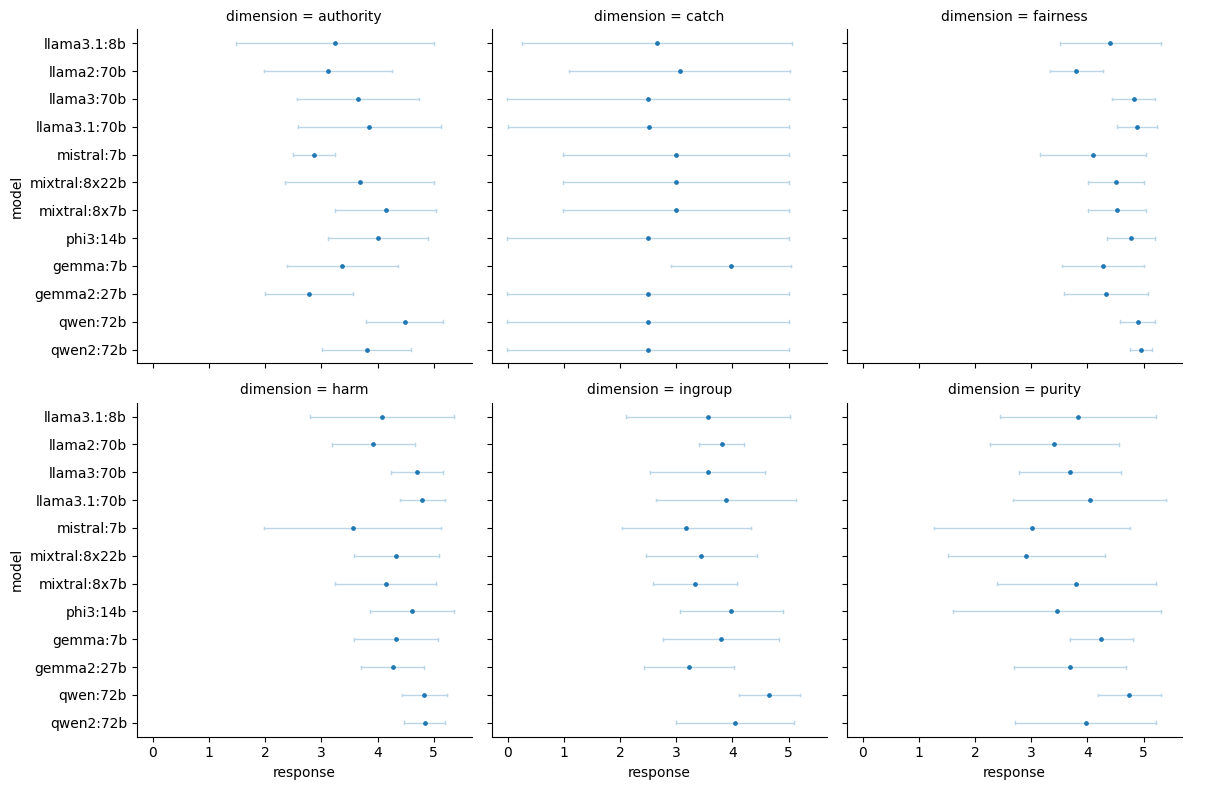

In [5]:
grid = seaborn.FacetGrid(
    dataset_long.droplevel(3).reset_index(),
    col="dimension",
    col_wrap=3,
    height=4,
)

grid.map_dataframe(
    seaborn.pointplot,
    x="response",
    y="model",
    errorbar="sd",
    capsize=0.1,
    markersize=1.4,
    linestyle="none",
    err_kws={"linewidth": 1, "alpha": 0.3},
)
grid.add_legend()
grid.savefig("./reports/points.by.model_dimension.pdf")

In [ ]:
cross_evaluation: llmv.data.CrossEvaluation = llmv.data.CrossEvaluation(
    data=pd.read_parquet("./data/cross_evaluation.parquet")
)
cross_evaluation.data

In [ ]:
fig, ax = plt.subplots(figsize=(10, int(len(cross_evaluation.data.droplevel(1)) * 0.35)))

sns.heatmap(cross_evaluation.data.droplevel(1), annot=True, fmt=".3f", cmap="crest")

ax.vlines(
    range(0, len(cross_evaluation.data.droplevel(1)), 3),
    *ax.get_ylim(),
    linewidth=3.0,
    color="white",
)

secx = ax.secondary_xaxis(location="top")
secx.set_xticks(
    [1.5, 4.5, 7.5],
    labels=["anonymous\n\n\n\n", "U.S.\n\n\n\n", "Korea\n\n\n\n"],
)
secx.tick_params(axis="x", labelsize="large")

ax.set(xlabel="", ylabel="")

ax.xaxis.tick_top()
ax.set_xticklabels(["liberal", "moderate", "conservative"] * 3)
ax.tick_params(axis="x", labelrotation=45)

fig.savefig("./report/heat.cross_evaluation.pdf", bbox_inches="tight")